1-)

### Según el INDEC, se puede identificar a una persona como desocupada si esta misma esta en la siguiente situación:

# Criterios para considerar a una persona como desocupada según INDEC:
- No tiene trabajo                     
- Está en condiciones para trabajar    
- Está buscando activamente trabajo   

### Si se dan estos 3 puntos entonces la persona en observacion es desocupada.

2-)

In [54]:
# Importamos las librerías que vamos a usar
import pandas as pd
import os
    
# Cargamos las dos bases
base_1t2004 = pd.read_stata(r"usu_individual_T104.dta")
base_1t2024 = pd.read_excel(r"usu_individual_T124.xlsx")

# Estandarizamos las columnas de las dos bases
base_1t2004.columns = base_1t2004.columns.str.upper()
base_1t2024.columns = base_1t2024.columns.str.upper()

# Convertimos REGION a string para unificar el tipo de dato
base_1t2004["REGION"] = base_1t2004["REGION"].astype(str)
base_1t2024["REGION"] = base_1t2024["REGION"].astype(str)

# Filtramos solo Gran Buenos Aires (REGION = 1)
filtro_gba = ['1', 'Gran Buenos Aires']
base_1t2004_gba = base_1t2004[base_1t2004["REGION"].isin(filtro_gba)].copy()
base_1t2024_gba = base_1t2024[base_1t2024["REGION"].isin(filtro_gba)].copy()

# Agregar columna de año a cada base
base_1t2004_gba["ANO4"] = 2004
base_1t2024_gba["ANO4"] = 2024

# Ver columnas en común
columnas_comunes = list(set(base_1t2004_gba.columns) & set(base_1t2024_gba.columns))
if "ANO4" not in columnas_comunes:
    columnas_comunes.append("ANO4")

# Unir las bases con las columnas en común
base_unida = pd.concat([base_1t2004_gba, base_1t2024_gba], ignore_index=True)

# Guardamos la base unida
base_unida.to_excel(r"C:\Users\martz\Desktop\TP2\1\baseGBA_unida.xlsx", index=False)

In [36]:
# Hacemos el listado de las 15 variables de interés
variables_interes = ["CODUSU", "NRO_HOGAR", "COMPONENTE", "CH04", "CH06", "ESTADO", "CAT_OCUP",
    "PP3E_TOT", "P47T", "NIVEL_ED", "AGLOMERADO", "REGION", "PONDERA", "TRIMESTRE", "ANO4"]

# Nos quedamos solo con esas variables dentro de la base
base_unificada = base_unida[variables_interes]

# Creamos un DataFrame para guardar los resultados
resumen_faltantes = pd.DataFrame(columns=["variable", "año", "faltantes"])

# Iteramos por cada año y calculamos la cantidad de valores faltantes
for año in [2004, 2024]:
    base_anual = base_unificada[base_unificada["ANO4"] == año]
    faltantes = base_anual.isnull().sum().reset_index()
    faltantes.columns = ["variable", "faltantes"]
    faltantes["año"] = año
    resumen_faltantes = pd.concat([resumen_faltantes, faltantes], ignore_index=True)

# Reordenamos para ver las variables por filas y años en columnas
tabla_final = resumen_faltantes.pivot(index="variable", columns="año", values="faltantes")

# Mostramos la tabla final
print("Valores faltantes por variable y año:")
print(tabla_final)

Valores faltantes por variable y año:
año        2004  2024
variable             
AGLOMERADO    0     0
ANO4          0     0
CAT_OCUP      0     0
CH04          0     0
CH06          0     0
CODUSU        0     0
COMPONENTE    0     0
ESTADO        0     0
NIVEL_ED      0     0
NRO_HOGAR     0     0
P47T          0    41
PONDERA       0     0
PP3E_TOT      0  3827
REGION        0     0
TRIMESTRE     0     0


In [37]:
# Importamos las librerías que vamos a usar
import numpy as np

# Lista de variables de interés
variables = ["CODUSU", "NRO_HOGAR", "COMPONENTE", "CH04", "CH06", "ESTADO", "CAT_OCUP",
             "PP3E_TOT", "P47T", "NIVEL_ED", "AGLOMERADO", "REGION", "PONDERA", "TRIMESTRE", "ANO4"]

# Filtramos la base con esas variables
base_unificada = base_unida[variables]

# Hacemos una copia para trabajar sobre ella
base_unificada_limpia = base_unificada.copy()

# Convertimos CH06 a numérico
base_unificada_limpia["CH06"] = pd.to_numeric(base_unificada_limpia["CH06"], errors='coerce')

# Variables a limpiar 
variables_inconsistentes = ["ESTADO", "CAT_OCUP", "PP3E_TOT", "P47T", "NIVEL_ED", "CH06"]

# Reemplazamos -1 y -2 por NaN en las variables definidas
base_unificada_limpia[variables_inconsistentes] = base_unificada_limpia[variables_inconsistentes].replace([-1, -2], np.nan)

# Para CH06, también marcamos como NaN valores fuera de 0 a 100
base_unificada_limpia.loc[~base_unificada_limpia["CH06"].between(0, 100), "CH06"] = np.nan

# Mostramos los valores faltantes después de la limpieza
faltantes_post = base_unificada_limpia.isna().sum()

print("Valores faltantes por variable después de la limpieza:")
print(faltantes_post)

Valores faltantes por variable después de la limpieza:
CODUSU           0
NRO_HOGAR        0
COMPONENTE       0
CH04             0
CH06           186
ESTADO           0
CAT_OCUP         0
PP3E_TOT      3827
P47T            41
NIVEL_ED         0
AGLOMERADO       0
REGION           0
PONDERA          0
TRIMESTRE        0
ANO4             0
dtype: int64


3-)

In [38]:
# Muestra las primeras filas del dataframe base_1t2004
print("Primeras filas de base_1t2004:")
print(base_1t2004.head())
# Cuenta y muestra la frecuencia de cada valor en la columna CH04 de base_1t2004
print("\nConteo de valores en CH04 para base_1t2004:")
print(base_1t2004['CH04'].value_counts())

# Muestra las primeras filas del dataframe base_1t2024
print("\nPrimeras filas de base_1t2024:")
print(base_1t2024.head())

# Cuenta y muestra la frecuencia de cada valor en la columna CH04 de base_1t2024
print("\nConteo de valores en CH04 para base_1t2024:")
print(base_1t2024['CH04'].value_counts())

Primeras filas de base_1t2004:
     CODUSU  NRO_HOGAR COMPONENTE H15    ANO4       TRIMESTRE  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              REGION MAS_500              AGLOMERADO  PONDERA  ... DECCFR  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   

  IDECCFR RDECCFR GDECCFR PDECCFR ADECCFR PJ1_1 PJ2_1 PJ3_1 IDIMPP  
0              06      06              04   0.

C:\Users\martz\AppData\Local\Temp\ipykernel_5948\2822611002.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, df['Varón'][i] + 0.5, f"{df['Varón'][i]:.1f}%", ha='center', va='bottom', fontsize=9)
C:\Users\martz\AppData\Local\Temp\ipykernel_5948\2822611002.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i + bar_width, df['Mujer'][i] + 0.5, f"{df['Mujer'][i]:.1f}%", ha='center', va='bottom', fontsize=9)


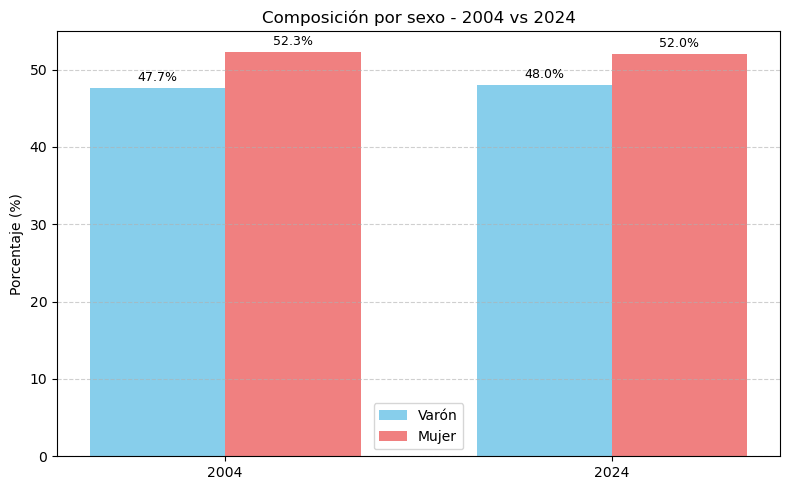

In [590]:
# Importamos las librerías que vamos a usar
import pandas as pd
import matplotlib.pyplot as plt

# Estandarizamos las columnas de las dos bases
base_1t2004.columns = base_1t2004.columns.str.upper()
base_1t2024.columns = base_1t2024.columns.str.upper()


base_1t2024['CH04'] = base_1t2024['CH04'].replace({1: 'Varón', 2: 'Mujer'})


sexo_2004 = base_1t2004['CH04'].value_counts(normalize=True).sort_index() * 100
sexo_2024 = base_1t2024['CH04'].value_counts(normalize=True).sort_index() * 100


df = pd.DataFrame({
    'Varón': [sexo_2004.get('Varón', 0), sexo_2024.get('Varón', 0)],
    'Mujer': [sexo_2004.get('Mujer', 0), sexo_2024.get('Mujer', 0)]
}, index=['2004', '2024'])


fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.35
x = range(len(df.index))


ax.bar(x, df['Varón'], width=bar_width, label='Varón', color='skyblue')
ax.bar([i + bar_width for i in x], df['Mujer'], width=bar_width, label='Mujer', color='lightcoral')


ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(df.index)
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Composición por sexo - 2004 vs 2024')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)


for i in x:
    ax.text(i, df['Varón'][i] + 0.5, f"{df['Varón'][i]:.1f}%", ha='center', va='bottom', fontsize=9)
    ax.text(i + bar_width, df['Mujer'][i] + 0.5, f"{df['Mujer'][i]:.1f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

4-)

In [ ]:
# Importamos las librerías que vamos a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leemos el archivo de Excel con la base unida
df = pd.read_excel("baseGBA_unida.xlsx") 

# Variables pedidas en la consigna para la matriz de correlación
variables = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF', 'ANO4'] 
df_filtered = df[variables].copy()

# Convertimos todas las variables no númericas a números
for col in df_filtered.columns:
    if df_filtered[col].dtype == 'object' or df_filtered[col].dtype.name == 'category':
        df_filtered[col] = pd.factorize(df_filtered[col])[0]

# Filtramos los datos por año y eliminamos la columna del año
df_2004 = df_filtered[df_filtered['ANO4'] == 2004].drop(columns='ANO4') 
df_2024 = df_filtered[df_filtered['ANO4'] == 2024].drop(columns='ANO4') 

# Calculamos las matrices de correlación para cada año
corr_2004 = df_2004.corr()
corr_2024 = df_2024.corr()
 
# Graficamos la matriz de correlación para 2004
plt.figure(figsize=(12, 10)) 
sns.heatmap(corr_2004, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matriz de correlación del año 2004", fontsize=12) 
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Graficamos la matriz de correlación para 2024
plt.figure(figsize=(12, 10)) 
sns.heatmap(corr_2024, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matriz de correlación del año 2024", fontsize=12) 
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

5-)

In [79]:
def analyze_employment_and_income(df_2004, df_2024):
    """
    Analiza la cantidad de desocupados e inactivos y la media del IPCF por estado
    para 2004 y 2024.

    Args:
        df_2004 (pd.DataFrame): DataFrame para 2004.
        df_2024 (pd.DataFrame): DataFrame para 2024.
    """

    for year, df in zip([2004, 2024], [df_2004, df_2024]):
        print(f"\n--- Análisis para {year} ---")

        
        desocupados = df[df['ESTADO'] == 2].shape[0] # Asegúrate del código para "desocupado"
        inactivos = df[df['ESTADO'] == 3].shape[0]   # Asegúrate del código para "inactivo"
        print(f"  Desocupados: {desocupados}, Inactivos: {inactivos}")

        
        media_ipcf = df.groupby('ESTADO')['IPCF'].mean()
        print("  Media del IPCF por estado:\n", media_ipcf)


analyze_employment_and_income(base_1t2004, base_1t2024)


--- Análisis para 2004 ---
  Desocupados: 0, Inactivos: 0
  Media del IPCF por estado:
 ESTADO
Entrevista individual no realizada (no respuesta al cuestion    107.955782
Ocupado                                                         368.184033
Desocupado                                                      187.322422
Inactivo                                                        265.826881
Menor de 10 años                                                196.084341
Name: IPCF, dtype: float64

--- Análisis para 2024 ---
  Desocupados: 1362, Inactivos: 18724
  Media del IPCF por estado:
 ESTADO
0         0.000000
1    189935.804812
2     97985.469567
3    141970.998369
4    114414.638143
Name: IPCF, dtype: float64


C:\Users\martz\AppData\Local\Temp\ipykernel_11728\3016104568.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_ipcf = df.groupby('ESTADO')['IPCF'].mean()


6-)

In [85]:
# Importamos las librerías que vamos a usar
import pandas as pd

# Unimos las bases de los dos años en un solo DataFrame
df_completo = pd.concat([df_2004, df_2024], ignore_index=True) 

# Separamos según si respondieron o no su condición de actividad
respondieron = df_completo[df_completo['ESTADO'] != 0].copy() 
norespondieron = df_completo[df_completo['ESTADO'] == 0].copy()

# Mostramos cuántas personas no respondieron
print(f"Cantidad de personas que no respondieron condición de actividad: {norespondieron.shape[0]}")

Cantidad de personas que no respondieron condición de actividad: 41


7-)

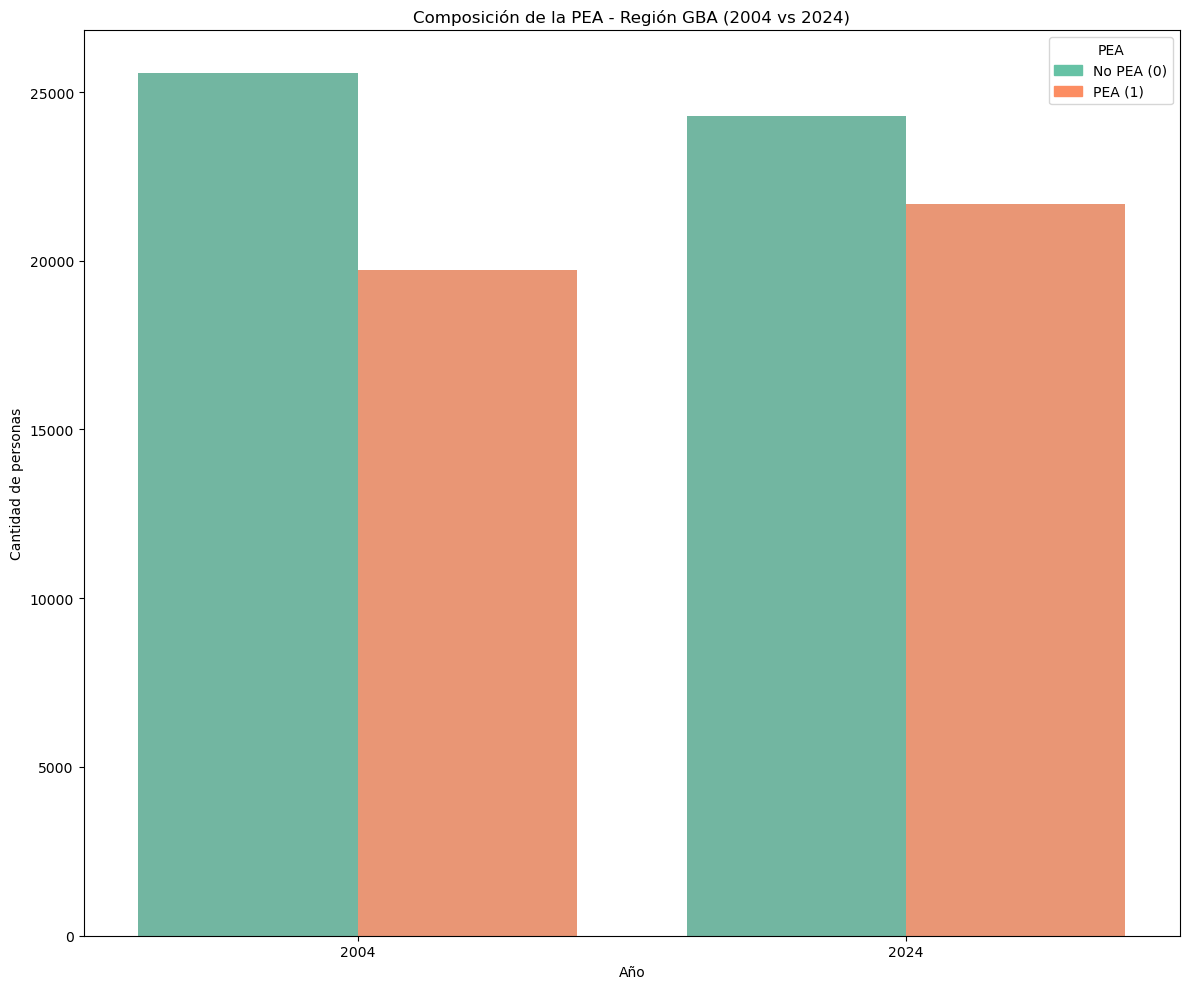

In [488]:
# Importamos las librerías que vamos a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos tener copias por año
df_2004 = df[df['ANO4'] == 2004].copy()
df_2024 = df[df['ANO4'] == 2024].copy()

# Asignamos el año a cada base
df_2004['ANO4'] = 2004 
df_2024['ANO4'] = 2024 

# Unimos las dos bases
df_completo = pd.concat([df_2004, df_2024], ignore_index=True) 

# Filtramos quienes respondieron la variable ESTADO
respondieron = df_completo[df_completo['ESTADO'] != 0].copy() 

# Creamos la variable PEA
respondieron['PEA'] = respondieron['ESTADO'].apply(definir_pea)

# Contamos cantidad de personas por año y por PEA
conteo_pea = respondieron.groupby(['ANO4', 'PEA']).size().reset_index(name='cantidad')

# Gráfico 
plt.figure(figsize=(12, 10)) 
sns.barplot(data=conteo_pea, x='ANO4', y='cantidad', hue='PEA', palette='Set2')
plt.title('Composición de la PEA - Región GBA (2004 vs 2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.legend(title='PEA', handles=handles)
plt.tight_layout()
plt.show()

8-)

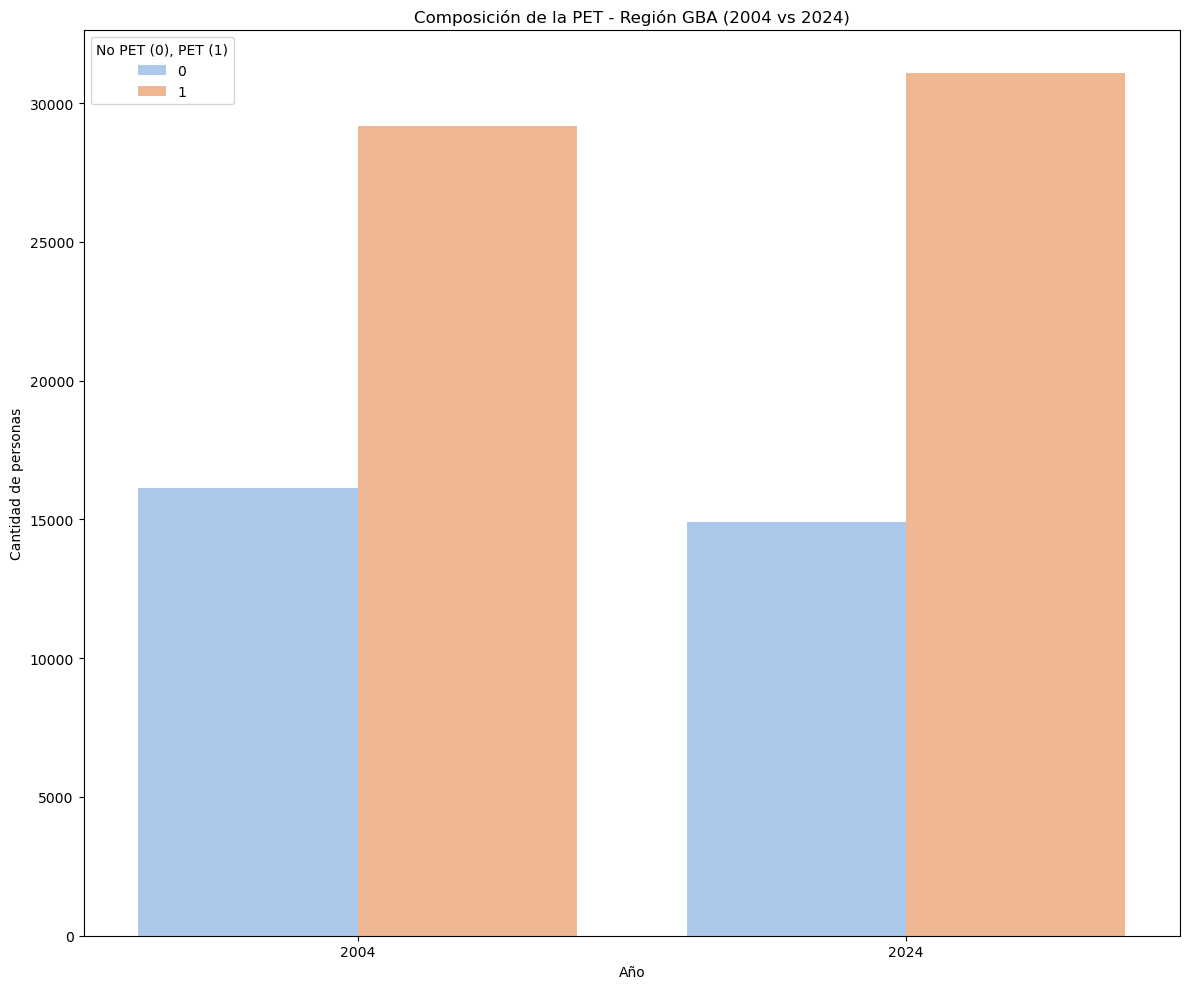

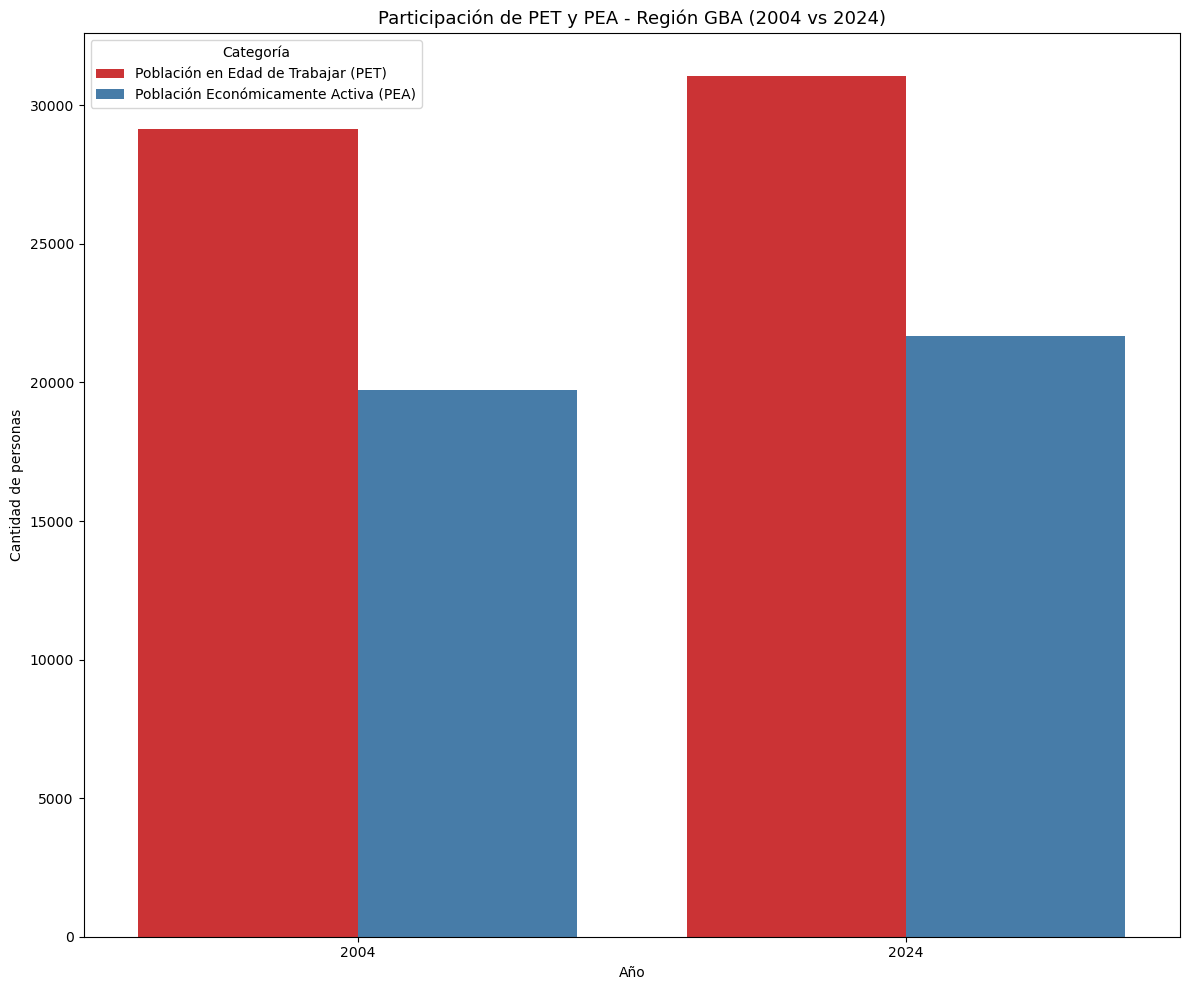

In [564]:
# Importamos las librerías que vamos a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nos aseguramos que CH06 sea numérica
respondieron['CH06'] = pd.to_numeric(respondieron['CH06'], errors='coerce')

# Creamos la variable PET 1 si edad entre 15 y 65, 0 en otro caso
respondieron['PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Agrupamos por año y PET para contar
conteo_pet = respondieron.groupby(['ANO4', 'PET']).size().reset_index(name='cantidad') 

# Gráfico de barras para PET
plt.figure(figsize=(12, 10)) 
plot = sns.barplot(data=conteo_pet, x='ANO4', y='cantidad', hue='PET', palette='pastel')
plt.title('Composición de la PET - Región GBA (2004 vs 2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.legend(title='No PET (0), PET (1)')
plt.tight_layout()
plt.show()

# Comparación entre PET y PEA
comparacion = respondieron.groupby(['ANO4', 'PET', 'PEA']).size().reset_index(name='cantidad') 

# Calculamos las cantidades para PET y PEA por año
total_pet_2004 = respondieron[(respondieron['ANO4'] == 2004) & (respondieron['PET'] == 1)].shape[0]
total_pet_2024 = respondieron[(respondieron['ANO4'] == 2024) & (respondieron['PET'] == 1)].shape[0]

# Armamos el DataFrame manualmente
comparacion = pd.DataFrame({'Año': [2004, 2004, 2024, 2024],
    'Grupo': ['PET', 'PEA', 'PET', 'PEA'],
    'Cantidad': [total_pet_2004, total_pea_2004, total_pet_2024, total_pea_2024]})

# Reemplazamos nombres para mayor claridad
comparacion['Grupo'] = comparacion['Grupo'].replace({'PET': 'Población en Edad de Trabajar (PET)',
    'PEA': 'Población Económicamente Activa (PEA)'})

# Gráfico
plt.figure(figsize=(12, 10))
sns.barplot(data=comparacion, x='Año', y='Cantidad', hue='Grupo', palette='Set1')
plt.title('Participación de PET y PEA - Región GBA (2004 vs 2024)', fontsize=13)
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

9-)

In [85]:
# Importamos las librerías necesarias
import pandas as pd

# Cargamos la base
df = pd.read_excel("baseGBA_unida.xlsx")

# Reemplazar valores textuales de ESTADO en 2004 por códigos numéricos
mapeo_estado = {"Ocupado": 1,"Desocupado": 2,"Inactivo": 3,"Menor de 10 años": 4}

df["ESTADO"] = df["ESTADO"].replace(mapeo_estado)

# Convertimos a numérico por si quedó algo textual
df["ESTADO"] = pd.to_numeric(df["ESTADO"], errors="coerce")

# Creamos la columna 'desocupado': 1 si ESTADO es 2, sino 0
df["desocupado"] = df["ESTADO"].apply(lambda x: 1 if x == 2 else 0)

# Agrupamos por año y sumamos la columna 'desocupado'
desocupados_por_año = df.groupby("ANO4")["desocupado"].sum().reset_index()

# Mostramos el resultado
print("Cantidad de personas desocupadas por año:")
print(desocupados_por_año)

Cantidad de personas desocupadas por año:
   ANO4  desocupado
0  2004        2717
1  2024        1362


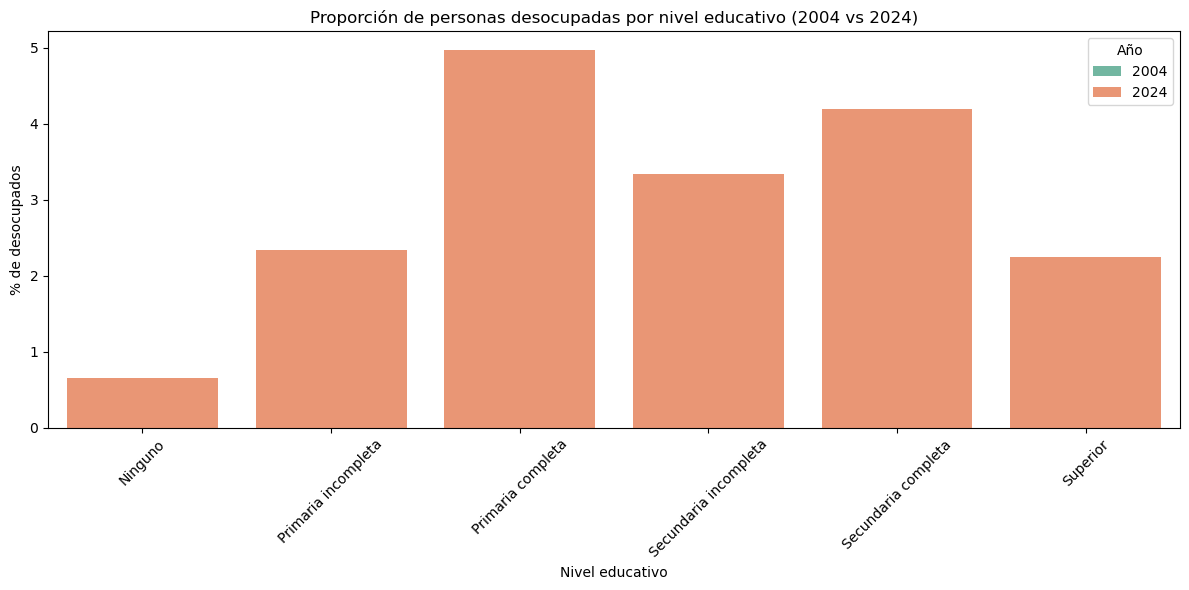

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_excel("baseGBA_unida.xlsx")

# Mapeamos 'ESTADO' para identificar desocupados
mapeo_estado = {
    "Ocupado": 1,
    "Desocupado": 2,
    "Inactivo": 3,
    "Menor de 10 años": 4
}
df["ESTADO"] = df["ESTADO"].replace(mapeo_estado)
df["ESTADO"] = pd.to_numeric(df["ESTADO"], errors="coerce")
df["desocupado"] = df["ESTADO"].apply(lambda x: 1 if x == 2 else 0)

# Mapeamos los códigos de nivel educativo a etiquetas legibles
niveles_educativos = {
    1: 'Ninguno',
    2: 'Primaria incompleta',
    3: 'Secundaria incompleta',
    4: 'Primaria completa',
    5: 'Secundaria completa',
    6: 'Superior'
}
df['NIVEL_ED'] = df['NIVEL_ED'].replace(niveles_educativos)

# Aseguramos el orden lógico en el gráfico
orden_niveles = [
    'Ninguno',
    'Primaria incompleta',
    'Primaria completa',
    'Secundaria incompleta',
    'Secundaria completa',
    'Superior'
]

# Agrupamos por año y nivel educativo y calculamos proporción de desocupados
proporcion_educ = df.groupby(['ANO4', 'NIVEL_ED'])['desocupado'].mean().reset_index()
proporcion_educ['porcentaje'] = proporcion_educ['desocupado'] * 100

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=proporcion_educ, x="NIVEL_ED", y="porcentaje", hue="ANO4", order=orden_niveles, palette='Set2')
plt.title("Proporción de personas desocupadas por nivel educativo (2004 vs 2024)")
plt.xlabel("Nivel educativo")
plt.ylabel("% de desocupados")
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.tight_layout()
plt.show()
plt.show()

C:\Users\martz\AppData\Local\Temp\ipykernel_11728\2808457073.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcion_edad = df.groupby(["ANO4", "grupo_edad"])["desocupado"].mean().reset_index()


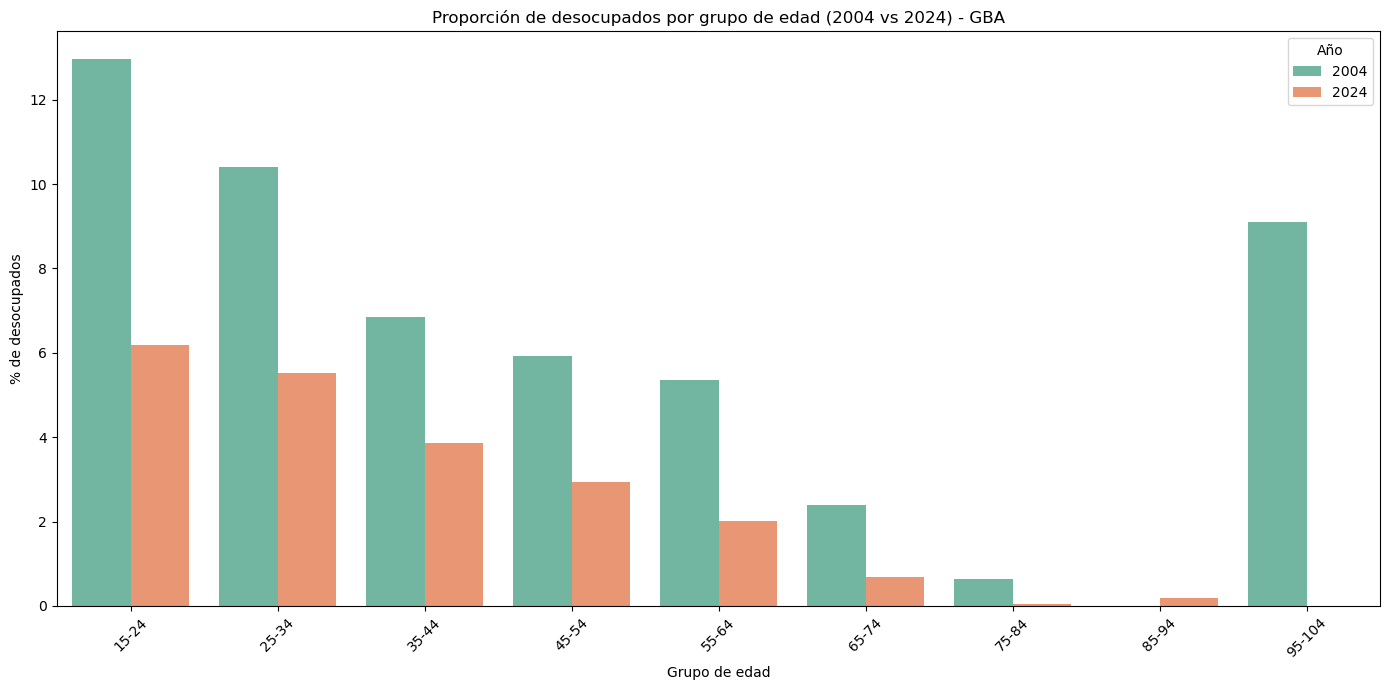

In [109]:
# Mapeo de estado
mapeo_estado = {"Ocupado": 1, "Desocupado": 2, "Inactivo": 3, "Menor de 10 años": 4}
df["ESTADO"] = df["ESTADO"].replace(mapeo_estado)
df["ESTADO"] = pd.to_numeric(df["ESTADO"], errors="coerce")
df["desocupado"] = df["ESTADO"].apply(lambda x: 1 if x == 2 else 0)

# Aseguramos que la edad (CH06) sea numérica y sin nulos
df["CH06"] = pd.to_numeric(df["CH06"], errors="coerce")
df = df.dropna(subset=["CH06"])

# Filtramos mayores de 15 años (inicio de PEA)
df = df[df["CH06"] >= 15]

# Agrupamos edades en intervalos de 10 en 10
max_edad = int(df["CH06"].max())
df["grupo_edad"] = pd.cut(
    df["CH06"],
    bins=range(15, max_edad + 10, 10),
    right=False,
    labels=[f'{i}-{i+9}' for i in range(15, max_edad, 10)])

# Calculamos la proporción de desocupados por grupo de edad y año
proporcion_edad = df.groupby(["ANO4", "grupo_edad"])["desocupado"].mean().reset_index()
proporcion_edad["porcentaje"] = proporcion_edad["desocupado"] * 100

# Gráfico
plt.figure(figsize=(14, 7))
sns.barplot(data=proporcion_edad, x="grupo_edad", y="porcentaje", hue="ANO4", palette="Set2")
plt.title("Proporción de desocupados por grupo de edad (2004 vs 2024) - GBA")
plt.xlabel("Grupo de edad")
plt.ylabel("% de desocupados")
plt.legend(title="Año")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()